In [321]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [322]:
url = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [323]:
def get_movies(soup):
    rows = soup.find_all("tr")[1:]
    movies_dict = {}
    for i, movie in enumerate(rows):
        row_html = str(movie)
        movie_soup = BeautifulSoup(row_html, 'html.parser')
        rank = movie_soup.find('td', class_='a-text-right').get_text(strip=True)
        title = movie_soup.find('td', class_='a-text-left').get_text(strip=True)
        box_office = movie_soup.find('td', class_='a-text-right mojo-field-type-money').get_text(strip=True)
        year = movie_soup.find('td', class_='a-text-left mojo-field-type-year').get_text(strip=True)
        movies_dict[rank] = {
            'movie_title': title,
            'boxoffice': box_office,
            'released': year
        }
    return movies_dict

In [324]:
movies_dict_1 = get_movies(soup)

In [325]:
movies_df_1 = pd.DataFrame.from_dict(movies_dict_1).T

In [326]:
url2 = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=200'
response2 = requests.get(url2)
soup2 = BeautifulSoup(response2.content, 'html.parser')

In [327]:
movies_dict_2 = get_movies(soup2)

In [328]:
movies_df_2 = pd.DataFrame.from_dict(movies_dict_2).T

In [329]:
url3 = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=400'
response3 = requests.get(url3)
soup3 = BeautifulSoup(response3.content, 'html.parser')

In [330]:
movies_dict_3 = get_movies(soup3)

In [331]:
movies_df_3 = pd.DataFrame.from_dict(movies_dict_3).T

In [332]:
url4 = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=600'
response4 = requests.get(url4)
soup4 = BeautifulSoup(response4.content, 'html.parser')

In [333]:
movies_dict_4 = get_movies(soup4)

In [334]:
movies_df_4 = pd.DataFrame.from_dict(movies_dict_4).T

In [335]:
url5 = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=800'
response5 = requests.get(url5)
soup5 = BeautifulSoup(response5.content, 'html.parser')

In [336]:
movies_dict_5 = get_movies(soup5)

In [337]:
movies_df_5 = pd.DataFrame.from_dict(movies_dict_5).T

In [338]:
movie_df = pd.concat([movies_df_1, movies_df_2, movies_df_3, movies_df_4, movies_df_5], axis=0)
movie_df.rename(columns={'released': 'Year'}, inplace=True)
movie_df_sorted = movie_df.sort_values(by='Year')
movie_df_sorted.tail(10)

,movie_title,boxoffice,Year
49,Spider-Man: Across the Spider-Verse,"$381,593,754",2023
709,The Flash,"$108,133,313",2023
859,M3GAN,"$95,159,005",2023
323,Mission: Impossible - Dead Reckoning Part One,"$172,135,383",2023
882,Dungeons & Dragons: Honor Among Thieves,"$93,277,026",2023
123,Dune: Part Two,"$277,239,255",2024
842,Bob Marley: One Love,"$96,870,413",2024
284,Kung Fu Panda 4,"$180,792,675",2024
317,Godzilla x Kong: The New Empire,"$173,230,709",2024
753,Ghostbusters: Frozen Empire,"$103,596,334",2024


In [271]:
url_infl = 'https://www.usinflationcalculator.com/inflation/historical-inflation-rates/'
response_infl = requests.get(url_infl)
soup_infl = BeautifulSoup(response_infl.content, 'html.parser')
table_infl = soup_infl.find('table')
table_infl

<table align="center" border="1" cellpadding="0" cellspacing="0">
<tbody>
<tr>
<th scope="row" valign="top">Year</th>
<th scope="col" valign="top">Jan</th>
<th scope="col" valign="top">Feb</th>
<th scope="col" valign="top">Mar</th>
<th scope="col" valign="top">Apr</th>
<th scope="col" valign="top">May</th>
<th scope="col" valign="top">Jun</th>
<th scope="col" valign="top">Jul</th>
<th scope="col" valign="top">Aug</th>
<th scope="col" valign="top">Sep</th>
<th scope="col" valign="top">Oct</th>
<th scope="col" valign="top">Nov</th>
<th scope="col" valign="top">Dec</th>
<th scope="col" valign="top">Ave</th>
</tr>
<tr bgcolor="#ffffff">
<th scope="row">1914</th>
<td align="center">2.0</td>
<td align="center">1.0</td>
<td align="center">1.0</td>
<td align="center">0.0</td>
<td align="center">2.1</td>
<td align="center">1.0</td>
<td align="center">1.0</td>
<td align="center">3.0</td>
<td align="center">2.0</td>
<td align="center">1.0</td>
<td align="center">1.0</td>
<td align="center">1.0</t

In [272]:
rows = table_infl.find_all('tr')

In [273]:
columns = [col.get_text(strip=True) for col in rows[0].find_all('th')]

In [274]:
data = []
for row in rows[1:]:
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
    data.append(row_data)

df_infl = pd.DataFrame(data, columns=columns)

In [275]:
df_infl = df_infl.filter(['Year','Ave'], axis=1)


In [276]:
df_infl

,Year,Ave
0,1914,1.0
1,1915,1.0
2,1916,7.9
3,1917,17.4
4,1918,18.0
...,...,...
106,2020,1.2
107,2021,4.7
108,2022,8.0
109,2023,4.1


In [277]:
df_infl.drop(df_infl.index[-1], inplace=True)

In [278]:
df_infl

,Year,Ave
0,1914,1.0
1,1915,1.0
2,1916,7.9
3,1917,17.4
4,1918,18.0
...,...,...
105,2019,1.8
106,2020,1.2
107,2021,4.7
108,2022,8.0


In [279]:
df_infl['Ave'] = df_infl['Ave'].astype(float)

In [280]:
df_infl['Ave'] = df_infl['Ave'] / 100 + 1

In [281]:
df_infl

,Year,Ave
0,1914,1.010
1,1915,1.010
2,1916,1.079
3,1917,1.174
4,1918,1.180
...,...,...
105,2019,1.018
106,2020,1.012
107,2021,1.047
108,2022,1.080


In [282]:
df_infl['Total'] = None

In [283]:
df_infl

,Year,Ave,Total
0,1914,1.010,None
1,1915,1.010,None
2,1916,1.079,None
3,1917,1.174,None
4,1918,1.180,None
...,...,...,...
105,2019,1.018,None
106,2020,1.012,None
107,2021,1.047,None
108,2022,1.080,None


In [284]:
df_infl['Total'] = df_infl['Ave'][::-1].cumprod()[::-1]

In [285]:
df_infl = df_infl.filter(['Year','Total'], axis=1)
df_infl

,Year,Total
0,1914,30.730
1,1915,30.426
2,1916,30.124
3,1917,27.919
4,1918,23.781
...,...,...
105,2019,1.213
106,2020,1.191
107,2021,1.177
108,2022,1.124


In [286]:
merged_df = pd.merge(movie_df, df_infl, on='Year', how='left')

In [240]:
merged_df

,movie_title,boxoffice,Year,Total
0,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,1.286
1,Avengers: Endgame,"$858,373,000",2019,1.213
2,Spider-Man: No Way Home,"$814,115,070",2021,1.177
3,Avatar,"$785,221,649",2009,1.414
4,Top Gun: Maverick,"$718,732,821",2022,1.124
...,...,...,...,...
995,Pinocchio,"$84,254,167",1940,21.883
996,Scooby-Doo 2: Monsters Unleashed,"$84,239,132",2004,1.653
997,Birds of Prey,"$84,172,791",2020,1.191
998,Atlantis: The Lost Empire,"$84,056,472",2001,1.766


In [288]:
merged_df['Total'].fillna(1.0, inplace=True)

In [250]:
sort_merg = merged_df.sort_values(by='Year')
sort_merg

,movie_title,boxoffice,Year,Total,boxoffice infl. adj.
266,Snow White and the Seven Dwarfs,184925486,1937,21.884,None
233,Gone with the Wind,200882193,1939,21.577,None
995,Pinocchio,84254167,1940,21.883,None
774,Bambi,102247150,1942,20.696,None
883,Cinderella,93141149,1950,12.776,None
...,...,...,...,...,...
761,Ghostbusters: Frozen Empire,102914270,2024,1.000,None
325,Godzilla x Kong: The New Empire,171616510,2024,1.000,None
288,Kung Fu Panda 4,179982475,2024,1.000,None
842,Bob Marley: One Love,96838001,2024,1.000,None


In [289]:
sort_merg = merged_df.sort_values(by='Year')
sort_merg

,movie_title,boxoffice,Year,Total
266,Snow White and the Seven Dwarfs,"$184,925,486",1937,21.884
233,Gone with the Wind,"$200,882,193",1939,21.577
995,Pinocchio,"$84,254,167",1940,21.883
774,Bambi,"$102,247,150",1942,20.696
883,Cinderella,"$93,141,149",1950,12.776
...,...,...,...,...
761,Ghostbusters: Frozen Empire,"$102,914,270",2024,1.000
325,Godzilla x Kong: The New Empire,"$171,616,510",2024,1.000
288,Kung Fu Panda 4,"$179,982,475",2024,1.000
842,Bob Marley: One Love,"$96,838,001",2024,1.000


In [290]:
merged_df['boxoffice'] = merged_df['boxoffice'].str.replace('$', '').str.replace(',', '')

In [291]:
merged_df

,movie_title,boxoffice,Year,Total
0,Star Wars: Episode VII - The Force Awakens,936662225,2015,1.286
1,Avengers: Endgame,858373000,2019,1.213
2,Spider-Man: No Way Home,814115070,2021,1.177
3,Avatar,785221649,2009,1.414
4,Top Gun: Maverick,718732821,2022,1.124
...,...,...,...,...
995,Pinocchio,84254167,1940,21.883
996,Scooby-Doo 2: Monsters Unleashed,84239132,2004,1.653
997,Birds of Prey,84172791,2020,1.191
998,Atlantis: The Lost Empire,84056472,2001,1.766


In [292]:
merged_df['boxoffice'] = merged_df['boxoffice'].astype(int)

In [293]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_title  1000 non-null   object 
 1   boxoffice    1000 non-null   int64  
 2   Year         1000 non-null   object 
 3   Total        1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [294]:
final = merged_df

In [295]:
final['boxoffice infl. adj.'] = None

In [296]:
final

,movie_title,boxoffice,Year,Total,boxoffice infl. adj.
0,Star Wars: Episode VII - The Force Awakens,936662225,2015,1.286,None
1,Avengers: Endgame,858373000,2019,1.213,None
2,Spider-Man: No Way Home,814115070,2021,1.177,None
3,Avatar,785221649,2009,1.414,None
4,Top Gun: Maverick,718732821,2022,1.124,None
...,...,...,...,...,...
995,Pinocchio,84254167,1940,21.883,None
996,Scooby-Doo 2: Monsters Unleashed,84239132,2004,1.653,None
997,Birds of Prey,84172791,2020,1.191,None
998,Atlantis: The Lost Empire,84056472,2001,1.766,None


In [297]:
final['boxoffice infl. adj.'] = final['boxoffice'] * final['Total']
final.sample(30)

,movie_title,boxoffice,Year,Total,boxoffice infl. adj.
314,Apollo 13,173837933,1995,2.054,357088762.965
871,DC League of Super-Pets,93657117,2022,1.124,105296823.501
901,Back to School,91258000,1986,2.828,258094454.114
979,Every Which Way But Loose,85196485,1978,5.022,427815475.829
608,G-Force,119436770,2009,1.414,168839852.735
578,Traffic,124115725,2000,1.826,226677213.899
326,True Grit,171243005,2010,1.419,243047084.924
713,A League of Their Own,107533928,1992,2.236,240435701.244
549,Dumb and Dumber,127190327,1994,2.108,268060657.850
973,Real Steel,85468508,2011,1.397,119396058.742


In [298]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [299]:
final.tail(10)

,movie_title,boxoffice,Year,Total,boxoffice infl. adj.
990,The Marvels,84500223,2023,1.041,87964732.143
991,The Santa Clause 3: The Escape Clause,84500122,2006,1.557,131541992.558
992,Ferdinand,84410380,2017,1.268,107021494.479
993,"Crazy, Stupid, Love.",84379584,2011,1.397,117874875.830
994,Annabelle,84284252,2014,1.306,110092776.248
995,Pinocchio,84254167,1940,21.883,1843750688.169
996,Scooby-Doo 2: Monsters Unleashed,84239132,2004,1.653,139255368.141
997,Birds of Prey,84172791,2020,1.191,100270552.263
998,Atlantis: The Lost Empire,84056472,2001,1.766,148467596.108
999,Cliffhanger,84049211,1993,2.171,182452517.763


In [300]:
sorted_df = final.sort_values(by='Year')
sorted_df

,movie_title,boxoffice,Year,Total,boxoffice infl. adj.
266,Snow White and the Seven Dwarfs,184925486,1937,21.884,4046941598.470
233,Gone with the Wind,200882193,1939,21.577,4334401739.946
995,Pinocchio,84254167,1940,21.883,1843750688.169
774,Bambi,102247150,1942,20.696,2116134404.489
883,Cinderella,93141149,1950,12.776,1190016522.886
...,...,...,...,...,...
761,Ghostbusters: Frozen Empire,102914270,2024,1.000,102914270.000
325,Godzilla x Kong: The New Empire,171616510,2024,1.000,171616510.000
288,Kung Fu Panda 4,179982475,2024,1.000,179982475.000
842,Bob Marley: One Love,96838001,2024,1.000,96838001.000


In [301]:
final

,movie_title,boxoffice,Year,Total,boxoffice infl. adj.
0,Star Wars: Episode VII - The Force Awakens,936662225,2015,1.286,1204208489.249
1,Avengers: Endgame,858373000,2019,1.213,1040939540.465
2,Spider-Man: No Way Home,814115070,2021,1.177,958312075.572
3,Avatar,785221649,2009,1.414,1110015848.401
4,Top Gun: Maverick,718732821,2022,1.124,808056935.994
...,...,...,...,...,...
995,Pinocchio,84254167,1940,21.883,1843750688.169
996,Scooby-Doo 2: Monsters Unleashed,84239132,2004,1.653,139255368.141
997,Birds of Prey,84172791,2020,1.191,100270552.263
998,Atlantis: The Lost Empire,84056472,2001,1.766,148467596.108


In [320]:
movie_df

,movie_title,boxoffice,Year
1,Star Wars: Episode VII - The Force Awakens,NaN,2015
2,Avengers: Endgame,NaN,2019
3,Spider-Man: No Way Home,NaN,2021
4,Avatar,NaN,2009
5,Top Gun: Maverick,NaN,2022
...,...,...,...
996,Pinocchio,NaN,1940
997,Scooby-Doo 2: Monsters Unleashed,NaN,2004
998,Birds of Prey,NaN,2020
999,Atlantis: The Lost Empire,NaN,2001


In [306]:
movie_df['boxoffice'] = pd.to_numeric(movie_df['boxoffice'], errors='coerce')

In [307]:
print(movie_df['boxoffice'].dtype)

float64


In [313]:
movie_df['boxoffice'] = movie_df['boxoffice'].str.replace('$', '').str.replace(',', '')

AttributeError: Can only use .str accessor with string values!

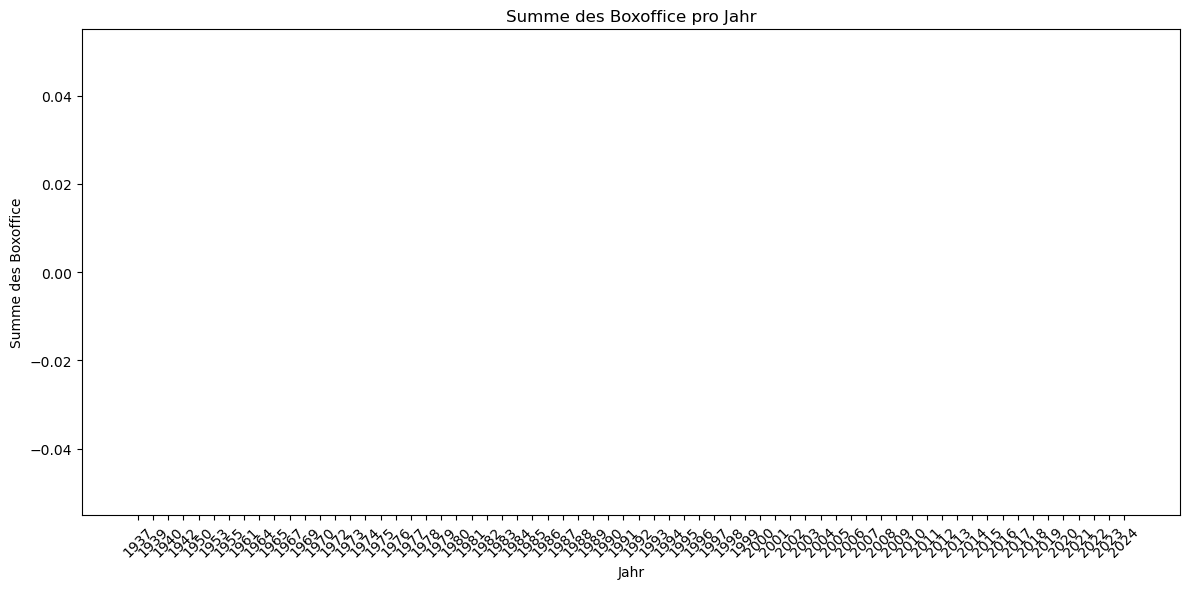

In [311]:
yearly_boxoffice = movie_df.groupby('Year')['boxoffice'].sum()

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.bar(yearly_boxoffice.index, yearly_boxoffice.values, color='skyblue')
plt.xlabel('Jahr')
plt.ylabel('Summe des Boxoffice')
plt.title('Summe des Boxoffice pro Jahr')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [312]:
print(yearly_boxoffice)

Year
1937   0.000
1939   0.000
1940   0.000
1942   0.000
1950   0.000
        ... 
2020   0.000
2021   0.000
2022   0.000
2023   0.000
2024   0.000
Name: boxoffice, Length: 66, dtype: float64


In [319]:
movie_df.type

AttributeError: 'DataFrame' object has no attribute 'type'

In [342]:
movie_df

,movie_title,boxoffice,Year
1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015
2,Avengers: Endgame,"$858,373,000",2019
3,Spider-Man: No Way Home,"$814,115,070",2021
4,Avatar,"$785,221,649",2009
5,Top Gun: Maverick,"$718,732,821",2022
...,...,...,...
996,Pinocchio,"$84,254,167",1940
997,Scooby-Doo 2: Monsters Unleashed,"$84,239,132",2004
998,Birds of Prey,"$84,172,791",2020
999,Atlantis: The Lost Empire,"$84,056,472",2001


In [343]:
movie_df['boxoffice'] = movie_df['boxoffice'].str.replace('$', '').str.replace(',', '')

In [344]:
movie_df

,movie_title,boxoffice,Year
1,Star Wars: Episode VII - The Force Awakens,936662225,2015
2,Avengers: Endgame,858373000,2019
3,Spider-Man: No Way Home,814115070,2021
4,Avatar,785221649,2009
5,Top Gun: Maverick,718732821,2022
...,...,...,...
996,Pinocchio,84254167,1940
997,Scooby-Doo 2: Monsters Unleashed,84239132,2004
998,Birds of Prey,84172791,2020
999,Atlantis: The Lost Empire,84056472,2001


In [345]:
movie_df['boxoffice'] = pd.to_numeric(movie_df['boxoffice'], errors='coerce')

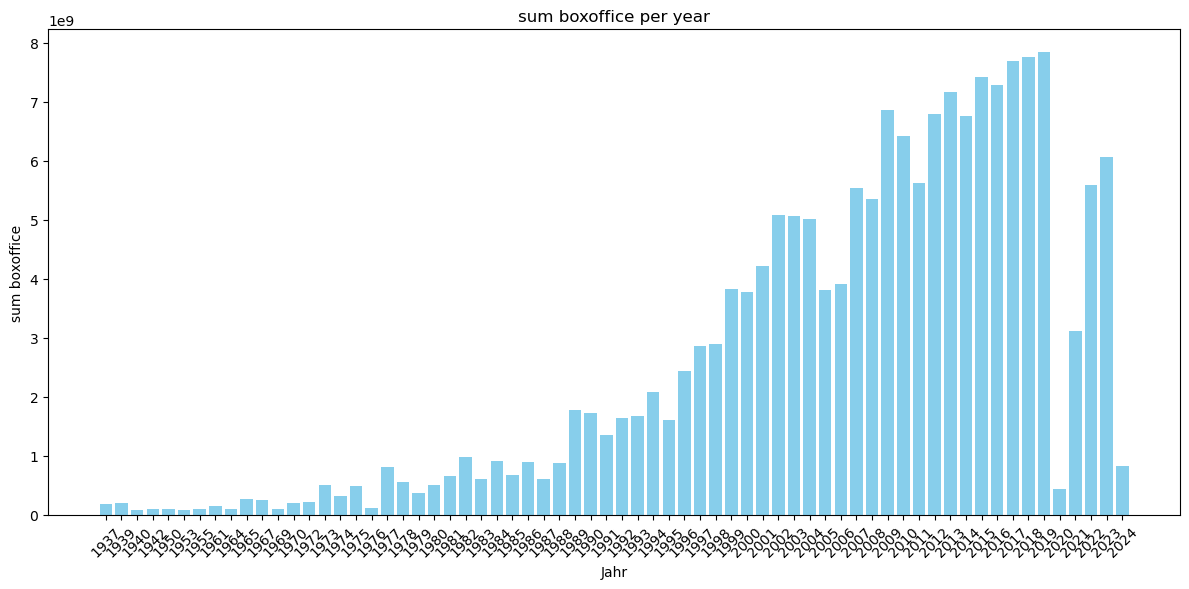

In [355]:
yearly_boxoffice = movie_df.groupby('Year')['boxoffice'].sum()

plt.figure(figsize=(12, 6))
plt.bar(yearly_boxoffice.index, yearly_boxoffice.values, color='skyblue')
plt.xlabel('Jahr')
plt.ylabel('sum boxoffice')
plt.title('sum boxoffice per year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [347]:
final

,movie_title,boxoffice,Year,Total,boxoffice infl. adj.
0,Star Wars: Episode VII - The Force Awakens,936662225,2015,1.286,1204208489.249
1,Avengers: Endgame,858373000,2019,1.213,1040939540.465
2,Spider-Man: No Way Home,814115070,2021,1.177,958312075.572
3,Avatar,785221649,2009,1.414,1110015848.401
4,Top Gun: Maverick,718732821,2022,1.124,808056935.994
...,...,...,...,...,...
995,Pinocchio,84254167,1940,21.883,1843750688.169
996,Scooby-Doo 2: Monsters Unleashed,84239132,2004,1.653,139255368.141
997,Birds of Prey,84172791,2020,1.191,100270552.263
998,Atlantis: The Lost Empire,84056472,2001,1.766,148467596.108


In [349]:
final_2 = final.drop(columns=['Total', 'boxoffice'])

In [350]:
final_2

,movie_title,Year,boxoffice infl. adj.
0,Star Wars: Episode VII - The Force Awakens,2015,1204208489.249
1,Avengers: Endgame,2019,1040939540.465
2,Spider-Man: No Way Home,2021,958312075.572
3,Avatar,2009,1110015848.401
4,Top Gun: Maverick,2022,808056935.994
...,...,...,...
995,Pinocchio,1940,1843750688.169
996,Scooby-Doo 2: Monsters Unleashed,2004,139255368.141
997,Birds of Prey,2020,100270552.263
998,Atlantis: The Lost Empire,2001,148467596.108


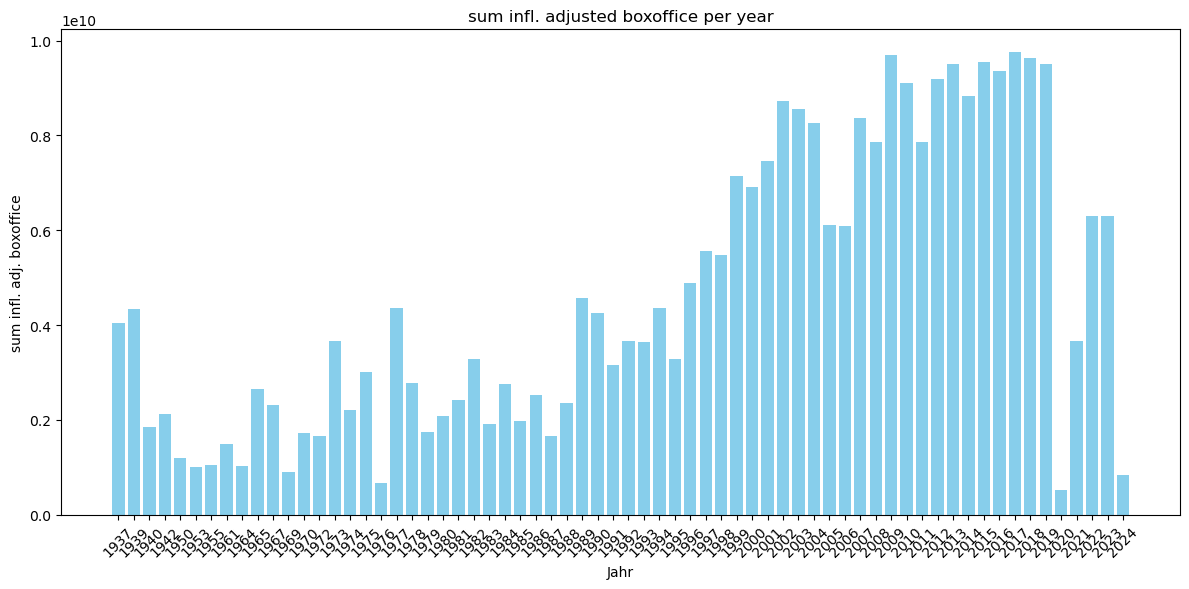

In [354]:
yearly_boxoffice_infl = final_2.groupby('Year')['boxoffice infl. adj.'].sum()

plt.figure(figsize=(12, 6))
plt.bar(yearly_boxoffice_infl.index, yearly_boxoffice_infl.values, color='skyblue')
plt.xlabel('Jahr')
plt.ylabel('sum infl. adj. boxoffice')
plt.title('sum infl. adjusted boxoffice per year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()